/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12706/2974467507.py:20: RuntimeWarning: divide by zero encountered in reciprocal
  basis_pursuit_losses.append(np.asarray(lengths)**(-1))
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12706/2974467507.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12706/2974467507.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


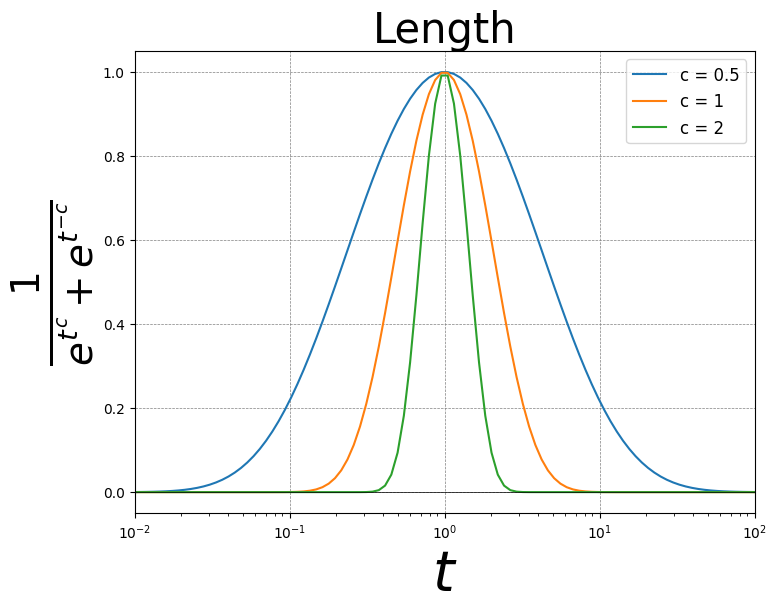

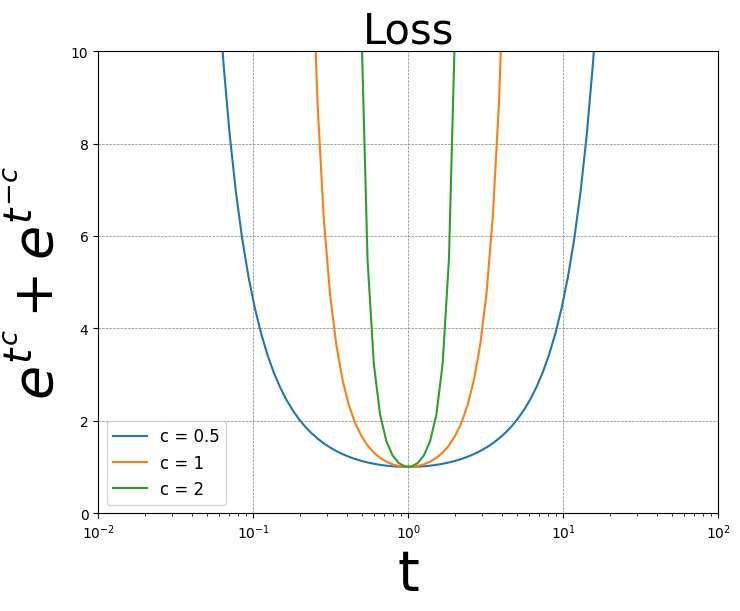

In [49]:
# now i want to check (high dimensional) versions of g() and isometry_loss from the package
from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

# matrix_values = np.logspace(0, 10, 400)
matrix_values = np.logspace(-2, 2, 100)
rearranged_matrix_values = rearrange(matrix_values, 'n -> n 1 1')

powers = [.5,1,2]
length_values = []
loss_values_isometry = []
basis_pursuit_losses = []
for power in powers:
    lengths = [exponential_transformation(rmv, power)[0][0] for rmv in rearranged_matrix_values]
    length_values.append(lengths)
    loss_values_isometry.append([isometry_loss(rmv, power) for rmv in rearranged_matrix_values])
    basis_pursuit_losses.append(np.asarray(lengths)**(-1))

# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
for i, power in enumerate(powers):
    ax.plot(matrix_values, length_values[i], label=f'c = {power}')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length', fontsize = 30)
ax.set_ylabel(r'$\frac{1}{e^{t^c} + e^{t^{-c}}}$', fontsize = 40) # log concave
ax.set_xlabel(r'$t$', fontsize = 40)
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e2)
ax.legend(fontsize=12)
fig.show()
fig.savefig('../figures/Figure_1a')

fig, ax = plt.subplots(1,1,figsize=(8, 6))
for i, power in enumerate(powers):
    ax.plot(matrix_values, basis_pursuit_losses[i], label=f'c = {power}')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Loss', fontsize = 30)
ax.set_ylim(0,10)
ax.set_ylabel(r'$e^{t^c} + e^{t^{-c}}$', fontsize = 40) # log concave
ax.set_xlabel('t', fontsize = 40)
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e2)
ax.legend(fontsize=12)
fig.show()
fig.savefig('../figures/Figure_1b')

In [19]:
basis_pursuit_losses

[array([[           nan, 2.50521619e+05, 4.00138491e+03, 6.40296173e+02,
         2.14876403e+02, 1.02065120e+02, 5.89595468e+01, 3.85196136e+01,
         2.73536025e+01, 2.06165944e+01, 1.62430030e+01, 1.32402237e+01,
         1.10857636e+01, 9.48415738e+00, 8.25837997e+00, 7.29720064e+00,
         6.52789039e+00, 5.90126031e+00, 5.38306264e+00, 4.94884423e+00,
         4.58075603e+00, 4.26551356e+00, 3.99305712e+00, 3.75565030e+00,
         3.54726013e+00, 3.36312251e+00, 3.19943218e+00, 3.05311794e+00,
         2.92167737e+00, 2.80305356e+00, 2.69554212e+00, 2.59772020e+00,
         2.50839177e+00, 2.42654497e+00, 2.35131863e+00, 2.28197573e+00,
         2.21788218e+00, 2.15848978e+00, 2.10332241e+00, 2.05196473e+00,
         2.00405297e+00, 1.95926728e+00, 1.91732538e+00, 1.87797734e+00,
         1.84100109e+00, 1.80619873e+00, 1.77339339e+00, 1.74242650e+00,
         1.71315558e+00, 1.68545223e+00, 1.65920047e+00, 1.63429531e+00,
         1.61064146e+00, 1.58815230e+00, 1.56674888

In [41]:
np.logspace(-2, 2, 100)

array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05480231e-02, 7.74263683e-02, 8.49753436e-02,
       9.32603347e-02, 1.02353102e-01, 1.12332403e-01, 1.23284674e-01,
       1.35304777e-01, 1.48496826e-01, 1.62975083e-01, 1.78864953e-01,
       1.96304065e-01, 2.15443469e-01, 2.36448941e-01, 2.59502421e-01,
       2.84803587e-01, 3.12571585e-01, 3.43046929e-01, 3.76493581e-01,
       4.13201240e-01, 4.53487851e-01, 4.97702356e-01, 5.46227722e-01,
       5.99484250e-01, 6.57933225e-01, 7.22080902e-01, 7.92482898e-01,
       8.69749003e-01, 9.54548457e-01, 1.04761575e+00, 1.14975700e+00,
       1.26185688e+00, 1.38488637e+00, 1.51991108e+00, 1.66810054e+00,
      

In [37]:
np.logspace(-3, 3, 400)

array([1.00000000e-03, 1.03523178e-03, 1.07170483e-03, 1.10946289e-03,
       1.14855124e-03, 1.18901674e-03, 1.23090791e-03, 1.27427499e-03,
       1.31916996e-03, 1.36564666e-03, 1.41376081e-03, 1.46357012e-03,
       1.51513429e-03, 1.56851516e-03, 1.62377674e-03, 1.68098528e-03,
       1.74020937e-03, 1.80152004e-03, 1.86499079e-03, 1.93069773e-03,
       1.99871964e-03, 2.06913808e-03, 2.14203749e-03, 2.21750528e-03,
       2.29563192e-03, 2.37651111e-03, 2.46023982e-03, 2.54691844e-03,
       2.63665090e-03, 2.72954479e-03, 2.82571150e-03, 2.92526634e-03,
       3.02832867e-03, 3.13502206e-03, 3.24547446e-03, 3.35981829e-03,
       3.47819065e-03, 3.60073348e-03, 3.72759372e-03, 3.85892347e-03,
       3.99488019e-03, 4.13562692e-03, 4.28133240e-03, 4.43217134e-03,
       4.58832461e-03, 4.74997943e-03, 4.91732965e-03, 5.09057590e-03,
       5.26992593e-03, 5.45559478e-03, 5.64780507e-03, 5.84678728e-03,
       6.05277998e-03, 6.26603016e-03, 6.48679353e-03, 6.71533479e-03,
      